# 必要なライブラリのインポート

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2023-05-31 05:38:06.707049: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# モデルの構築

基本的にはmnistと同じ。しかしそのままだと過学習傾向にあったため、Poolingのサイズを下げてモデルの複雑さを下げる。
またDropoutのrateを上げてロバスト性を向上させる。

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

2023-05-31 05:38:08.554026: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 05:38:08.559295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 05:38:08.559601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 05:38:08.561584: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-31 05:38:08.561841: I tensorflow/compile

# モデルの内容を確認

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 128)               663680    
                                                        

# 学習データをロード・正規化する関数の作成

水平反転した画像を加えることでデータパターンを増やす。

In [4]:
def load_data(img_rows, img_cols, num_classes):
    # データを読み込み、訓練データとテストデータに分割
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # 画像の水平反転
    x_train_flipped = np.flip(x_train, axis=2)
    x_test_flipped = np.flip(x_test, axis=2)
    
    # 元のデータと反転データを結合
    x_train = np.concatenate((x_train, x_train_flipped), axis=0)
    x_test = np.concatenate((x_test, x_test_flipped), axis=0)
    
    # ラベルも同様に結合
    y_train = np.concatenate((y_train, y_train), axis=0)
    y_test = np.concatenate((y_test, y_test), axis=0)
    
    # 画像データの形状を調整
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
    # 画像データの型を変更し、グレースケールを正規化
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    # クラスラベルをOne-hotエンコーディング
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)
    return (x_train, y_train), (x_test, y_test)

# モデルの訓練
モデルの複雑さを下げた分、エポックを増やす。

Epoch 1/12


2023-05-31 05:38:11.012464: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-31 05:38:11.767072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-31 05:38:12.567625: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x34c79560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-31 05:38:12.567674: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-31 05:38:12.573884: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-31 05:38:12.692263: I ./tensorflow/compiler/jit/device_compiler.h:180] Co

938/938 [==============================] - 15s 12ms/step - loss: 0.4890 - accuracy: 0.8254 - val_loss: 0.3081 - val_accuracy: 0.8846
Epoch 2/12
938/938 [==============================] - 11s 11ms/step - loss: 0.3286 - accuracy: 0.8819 - val_loss: 0.2659 - val_accuracy: 0.9007
Epoch 3/12
938/938 [==============================] - 11s 11ms/step - loss: 0.2902 - accuracy: 0.8944 - val_loss: 0.2422 - val_accuracy: 0.9089
Epoch 4/12
938/938 [==============================] - 11s 12ms/step - loss: 0.2649 - accuracy: 0.9046 - val_loss: 0.2354 - val_accuracy: 0.9113
Epoch 5/12
938/938 [==============================] - 11s 11ms/step - loss: 0.2450 - accuracy: 0.9108 - val_loss: 0.2138 - val_accuracy: 0.9226
Epoch 6/12
938/938 [==============================] - 11s 12ms/step - loss: 0.2330 - accuracy: 0.9153 - val_loss: 0.2082 - val_accuracy: 0.9239
Epoch 7/12
938/938 [==============================] - 10s 11ms/step - loss: 0.2222 - accuracy: 0.9187 - val_loss: 0.2085 - val_accuracy: 0.9237
Epo

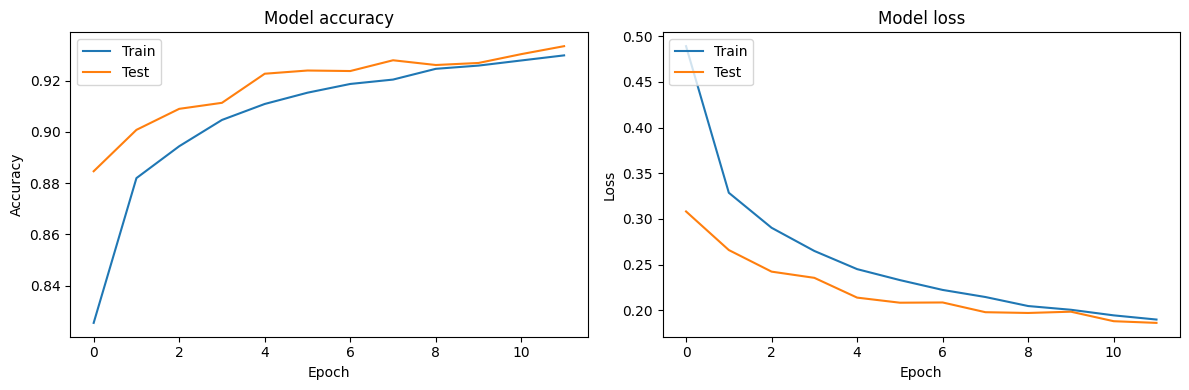

In [5]:
(x_train, y_train), (x_test, y_test) = load_data(img_rows, img_cols, num_classes)
history = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(x_test, y_test))
model.save('fashion_mnist_model.h5')

# 精度の学習曲線
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# 損失の学習曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# 動作確認

625/625 [==============================] - 1s 2ms/step


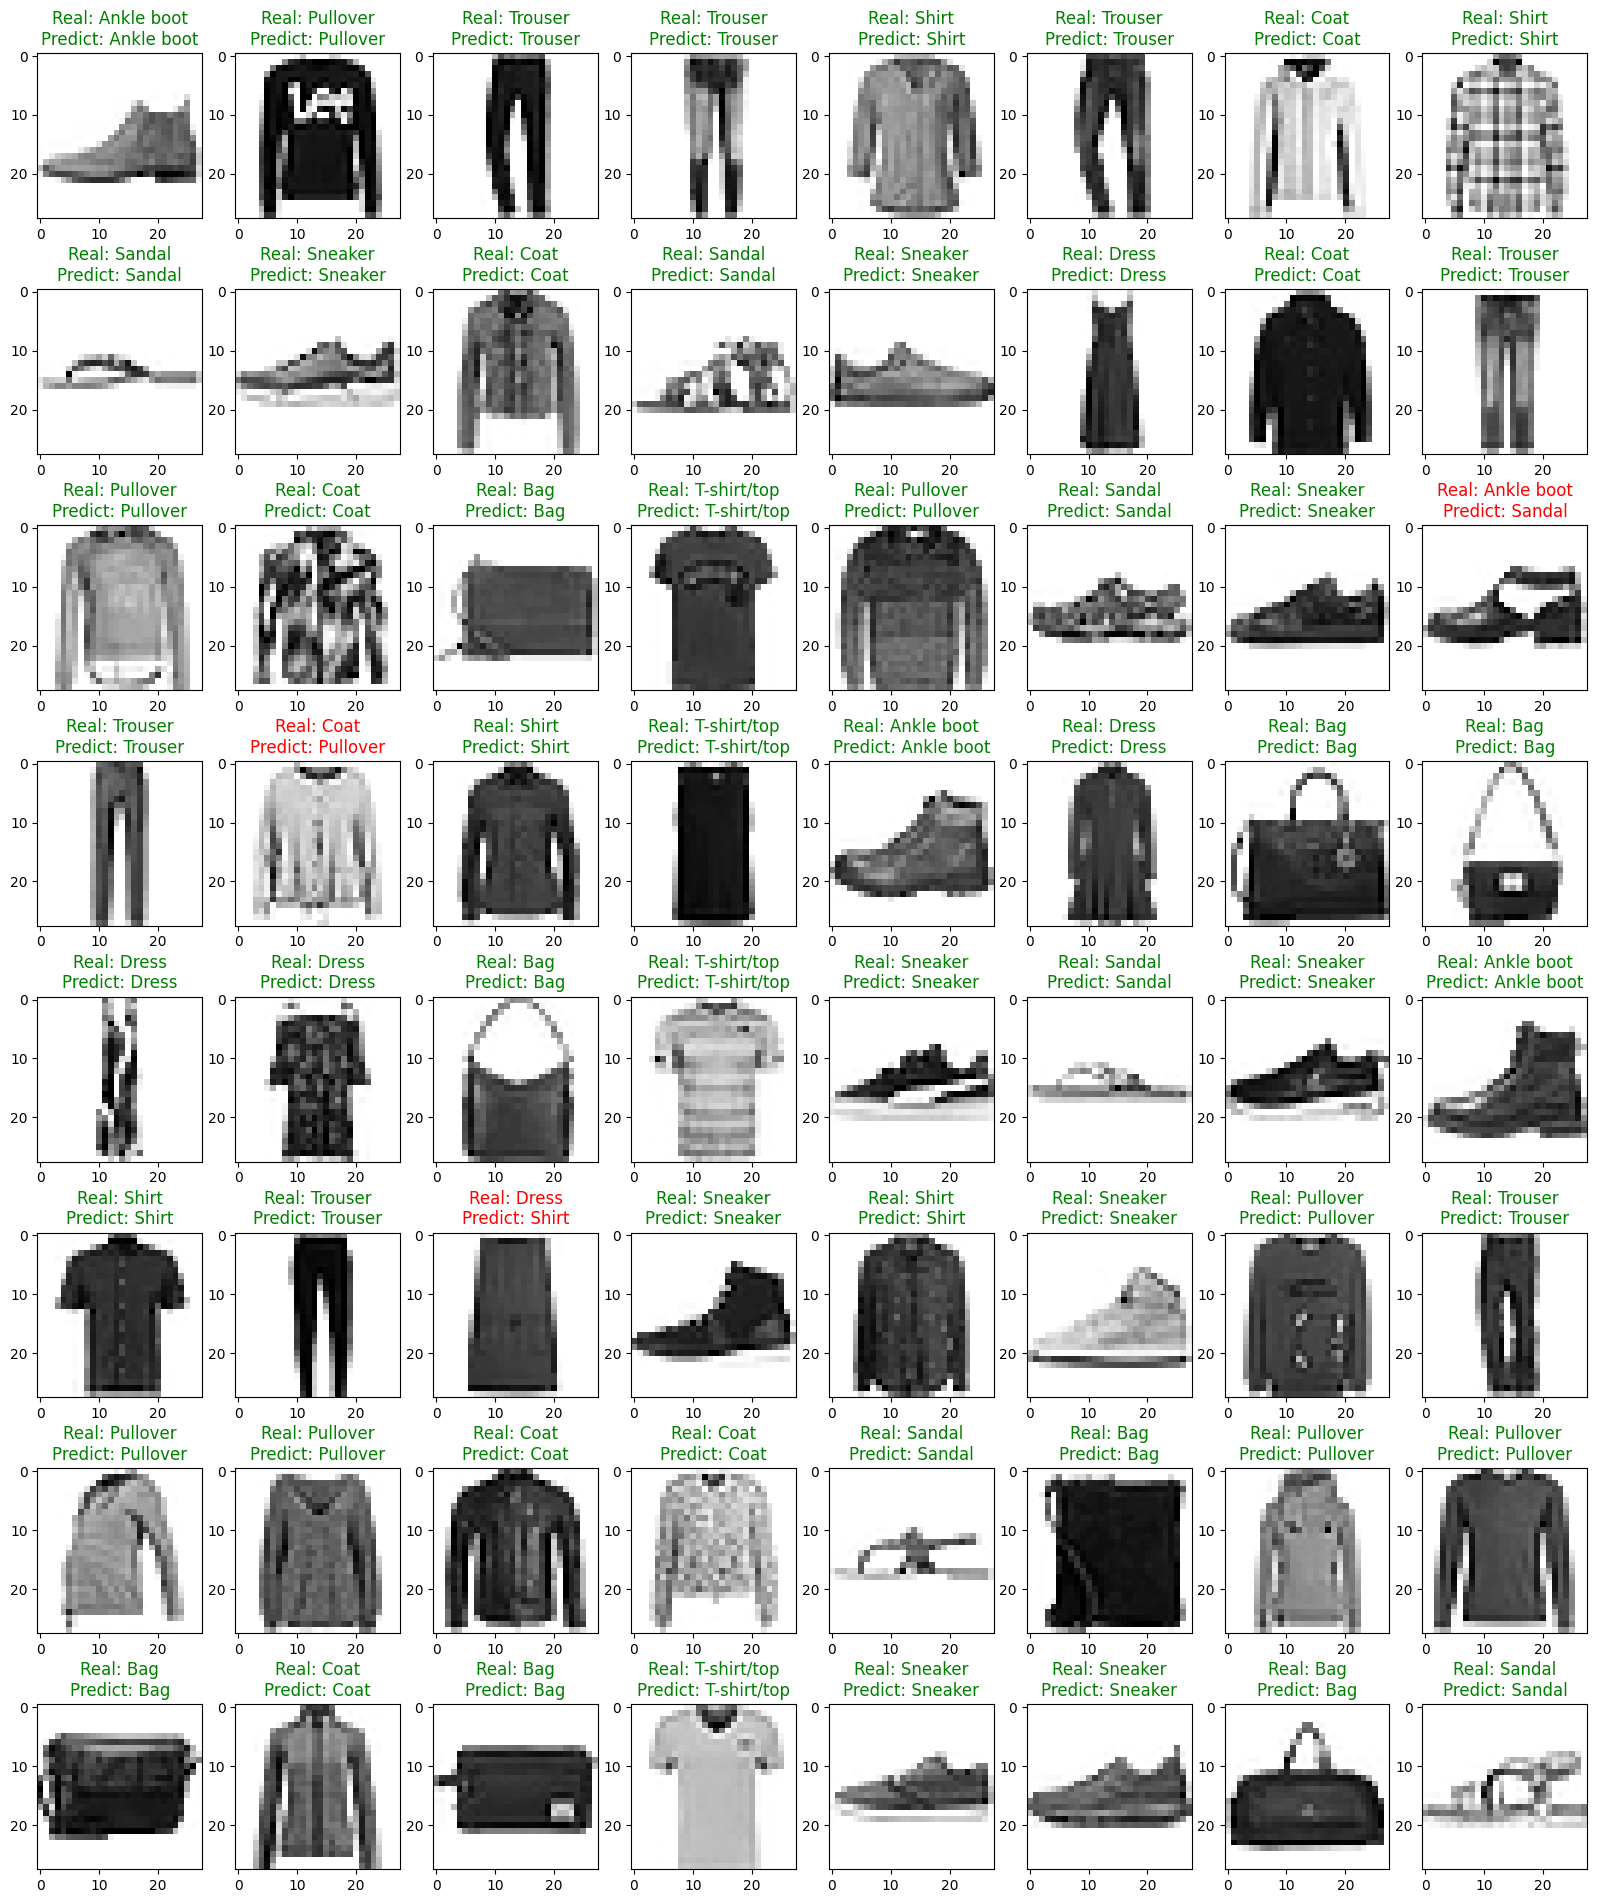

In [6]:
model = load_model('fashion_mnist_model.h5')
y_pred = model.predict(x_test)

def plot_pred(y_pred):
    fig, axis = plt.subplots(8, 8, figsize=(20, 24))
    for i, ax in enumerate(axis.flat):
        expected = y_test[i].argmax()
        actual = y_pred[i].argmax()
        ax.imshow(x_test[i], cmap='binary')
        ax.set_title(f"Real: {class_names[expected]}\nPredict: {class_names[actual]}", color=("green" if expected == actual else "red"))
plot_pred(y_pred)

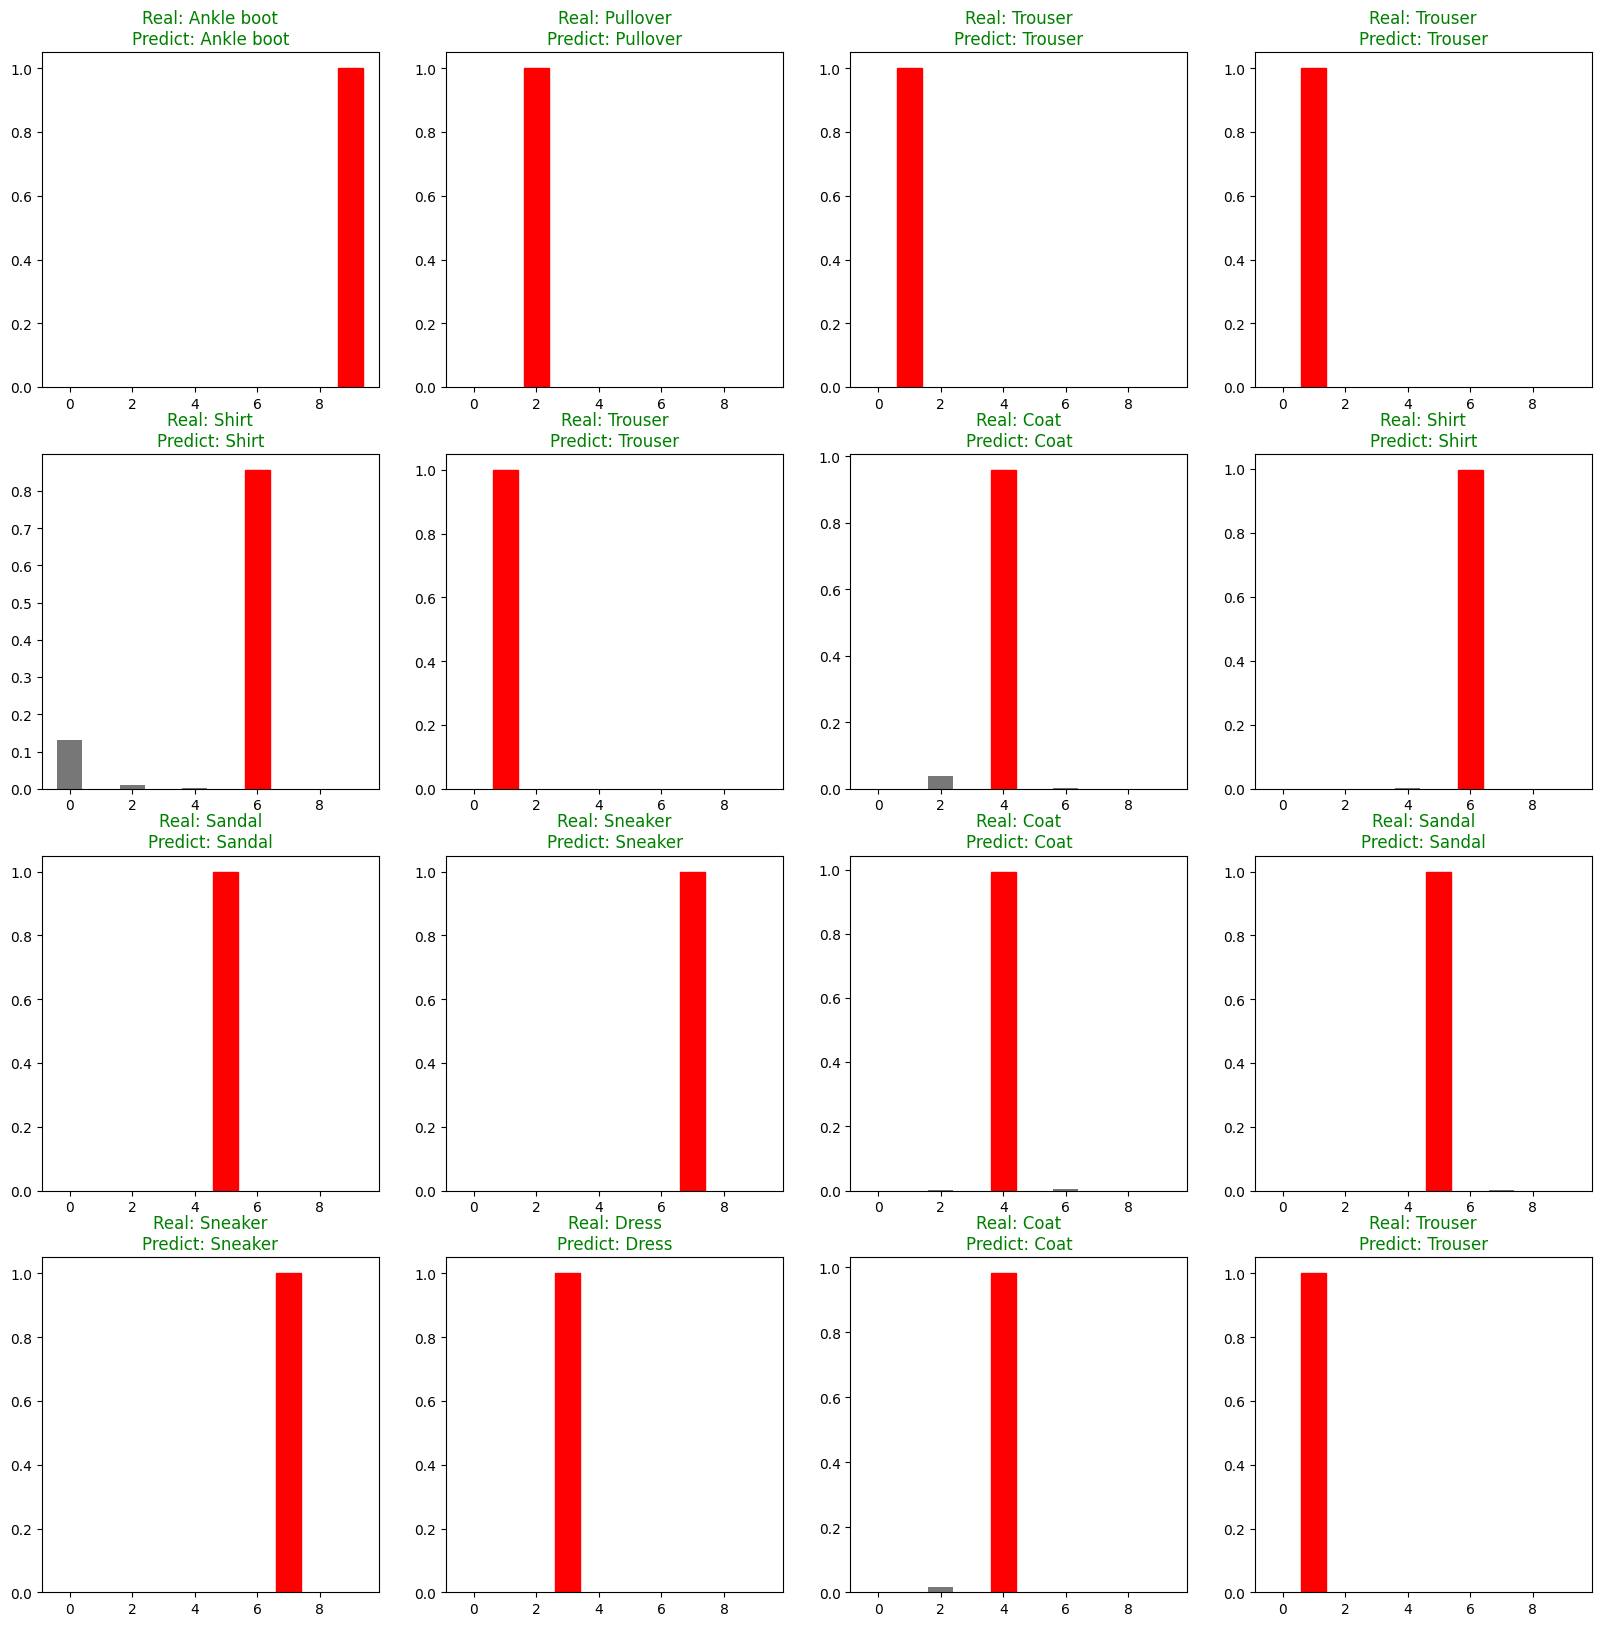

In [7]:
def plot_value_array(y_pred):
    fig, axis = plt.subplots(4, 4, figsize=(20, 20))
    for i, ax in enumerate(axis.flat):
        expected = y_test[i].argmax()
        actual = y_pred[i].argmax()
        thisplot = ax.bar(range(10), y_pred[i], color="#777777")
        thisplot[actual].set_color('red')
        ax.set_title(f"Real: {class_names[expected]}\nPredict: {class_names[actual]}", color=("green" if expected == actual else "red"))

plot_value_array(y_pred)